# JUMPMAN23 NEW MARKET ANALYSIS
<code>OVERVIEW:</code><br>
This analysis aims to illustrate how are things going in New York per CEO's ask. The sample of data is for October of 2014, which has been analysed to identify any potential opportunities and data integrity issues. Additionally, line graphs, bar graphs and histograms, pie charts, and boxplot have been utilized in the following analysis in order to crystalize the stories behind data. <br><br>
<code>OBJECTIVE:</code><br>
Deliver actionable insights in order to help the team pour more resources into NYC to grow the market by 20%.

<code>DATA INTEGRITY ISSUE</code><br>
7 out of 18 columns contain missing values. This could have an effect on the conclusions that can be drawn from the data. Dropped missing timestamp values in order to proceed analysis in PART 4.

<code>MAJOR QUESTIONS THAT HAVE BEEN ANSWERED THROUGH THIS ANALYSIS</code><br>
1. How are things going in New York? (CEO's ask)
2. What are the most popular restaurants and items
3. What's the major delivery method?
4. How long it took to pick up the food, wait at the restaurant, and drop off?
5. How long it took to order?

<code>RECOMMENDATIONS</code><br>
1. **Launch custom promo / discounts to improve customer retention.** 
2. **Standardize the delivery process to improve delivery efficiency.** 
3. **Optimize menu and UX to smooth the ordering process.**

<code><span style="color:red">**BELOW PLEASE FIND THE DETAILED ANALYSIS UNDER 'MARKET ANALYSIS' SECTION**<code>

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from folium import plugins
import plotly.offline as py 
import plotly.graph_objs as go
import cufflinks as cf
import plotly.figure_factory as ff

import datetime as dt

In [2]:
raw_df = pd.read_csv("/Users/tianyixu/Desktop/Jumpman23/analyze_me.csv")

## EDA

In [3]:
raw_df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [4]:
# The mean of item quantity is around 1 item per order.
# Recommendation: increase the items per customer by offering deals / discounts / coupons, or increasing free shipping thresholds

raw_df.item_quantity.describe()

count    4753.000000
mean        1.248264
std         0.785904
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: item_quantity, dtype: float64

In [5]:
raw_df.columns

Index(['delivery_id', 'customer_id', 'jumpman_id', 'vehicle_type',
       'pickup_place', 'place_category', 'item_name', 'item_quantity',
       'item_category_name', 'how_long_it_took_to_order', 'pickup_lat',
       'pickup_lon', 'dropoff_lat', 'dropoff_lon', 'when_the_delivery_started',
       'when_the_Jumpman_arrived_at_pickup', 'when_the_Jumpman_left_pickup',
       'when_the_Jumpman_arrived_at_dropoff'],
      dtype='object')

In [6]:
raw_df.shape

(5983, 18)

In [7]:
raw_df.dtypes.value_counts()

object     10
float64     5
int64       3
dtype: int64

## Data Pre-processing (revised data has been used in PART 4)

In [8]:
# See how much missing data per column

raw_df.isna().sum()

delivery_id                               0
customer_id                               0
jumpman_id                                0
vehicle_type                              0
pickup_place                              0
place_category                          883
item_name                              1230
item_quantity                          1230
item_category_name                     1230
how_long_it_took_to_order              2945
pickup_lat                                0
pickup_lon                                0
dropoff_lat                               0
dropoff_lon                               0
when_the_delivery_started                 0
when_the_Jumpman_arrived_at_pickup      550
when_the_Jumpman_left_pickup            550
when_the_Jumpman_arrived_at_dropoff       0
dtype: int64

In [9]:
# Get the percentage number of missing data per column

round(raw_df.isna().sum()/5983, 2)

delivery_id                            0.00
customer_id                            0.00
jumpman_id                             0.00
vehicle_type                           0.00
pickup_place                           0.00
place_category                         0.15
item_name                              0.21
item_quantity                          0.21
item_category_name                     0.21
how_long_it_took_to_order              0.49
pickup_lat                             0.00
pickup_lon                             0.00
dropoff_lat                            0.00
dropoff_lon                            0.00
when_the_delivery_started              0.00
when_the_Jumpman_arrived_at_pickup     0.09
when_the_Jumpman_left_pickup           0.09
when_the_Jumpman_arrived_at_dropoff    0.00
dtype: float64

In [10]:
raw_df[raw_df.item_name.isna()].head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
8,1487674,55375,181543,bicycle,Cafe Zaiya,NaN,NaN,NaN,NaN,NaN,40.729357,-73.990156,40.719758,-73.985011,2014-10-30 16:49:48.259935,2014-10-30 16:55:32.446053,2014-10-30 17:01:22.214264,2014-10-30 17:10:44.731901
10,1332793,104167,83565,bicycle,El Toro Blanco,Mexican,NaN,NaN,NaN,00:07:00.095332,40.728997,-74.002810,40.746060,-73.994674,2014-10-10 19:08:02.25412,2014-10-10 19:40:04.278217,2014-10-10 19:44:39.877927,2014-10-10 19:54:14.570666
16,1274468,95986,151467,bicycle,McDonald's,Fast Food,NaN,NaN,NaN,NaN,40.777940,-73.954710,40.784337,-73.953907,2014-10-01 18:17:51.625284,2014-10-01 18:18:53.498048,2014-10-01 18:34:09.732141,2014-10-01 18:42:50.967369
20,1413356,78465,158227,bicycle,Duane Reade,Drug Store,NaN,NaN,NaN,NaN,40.742876,-73.992561,40.742506,-73.992564,2014-10-21 10:08:40.392943,NaN,NaN,2014-10-21 10:27:55.756742
25,1360308,57174,61900,bicycle,Umami Burger,Burger,NaN,NaN,NaN,00:02:40.200298,40.734446,-73.998713,40.720956,-73.999281,2014-10-14 11:32:50.35313,2014-10-14 12:04:38.153601,2014-10-14 12:14:27.858646,2014-10-14 12:24:02.125908


In [11]:
# Seems like the missing data in column 'item_name', 'item_quantity', 'item_category_name' are the same.
# So dropping them out to have a cleaner data

df_dropped = raw_df.dropna(subset = ['item_name'], how = 'all')
df_dropped.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [12]:
# Updated data shape

df_dropped.shape

(4753, 18)

In [13]:
# Updated % of missing data.
# As most of the columns have lower than 10% of missing data now, proceeding to analyze data.

round(df_dropped.isna().sum()/4753*100,2)

delivery_id                             0.00
customer_id                             0.00
jumpman_id                              0.00
vehicle_type                            0.00
pickup_place                            0.00
place_category                          7.74
item_name                               0.00
item_quantity                           0.00
item_category_name                      0.00
how_long_it_took_to_order              44.56
pickup_lat                              0.00
pickup_lon                              0.00
dropoff_lat                             0.00
dropoff_lon                             0.00
when_the_delivery_started               0.00
when_the_Jumpman_arrived_at_pickup      8.21
when_the_Jumpman_left_pickup            8.21
when_the_Jumpman_arrived_at_dropoff     0.00
dtype: float64

## MARKET ANALYSIS

### PART 1: How are things going in New York? (CEO's ask)

<span style="color:navy">Jumpman23 was doing well by acquiring 3,192 unique customers with over 83% of them prefer to order 1 item in October 2014. We can see from the line graph below that the number of orders was also trending up WoW, and they typically order the most during the weekends, especially Sunday.<br><br>
In general, 41% of users order food delivery from 6pm - 8pm EST, and 7pm EST is the busiest hour. 17% of users order lunch from 11am - 1pm EST, and 8% of users want late night meal from 10pm - 1am EST. We can leverage the info here to better inform marketing promo strategy in terms of when to push the notification.<br><br>
Furthermore, we can see from the pie chart that the repeat customer rate was 39%, which is pretty solid. <br><br>
As far as pickup and dropoff locations, we can see from the heatmap that most of the restaurants are located in downtown and midtown manhattan, and the restaurants around Central Park are also very popular. On the other hand, people who are located in downtown, midtown, and upper east side tend to order food delivery the most in October 2014. Drop-off places in Brooklyn are more spread out than their pick up places, indicating most of the time people who live in Brooklyn would like to order food from Manhattan. These information can be utilized to better allocate Jumpmen resource in order to improve delivery efficiency during peak hours

In [14]:
raw_df['month'] = pd.DatetimeIndex(raw_df.when_the_delivery_started).month
raw_df['day'] = pd.DatetimeIndex(raw_df.when_the_delivery_started).day
raw_df['weekday'] = pd.DatetimeIndex(raw_df.when_the_delivery_started).weekday
raw_df['year'] = pd.DatetimeIndex(raw_df.when_the_delivery_started).year
raw_df['hour'] = pd.DatetimeIndex(raw_df.when_the_delivery_started).hour

In [15]:
date_count = raw_df.day.value_counts().sort_index()

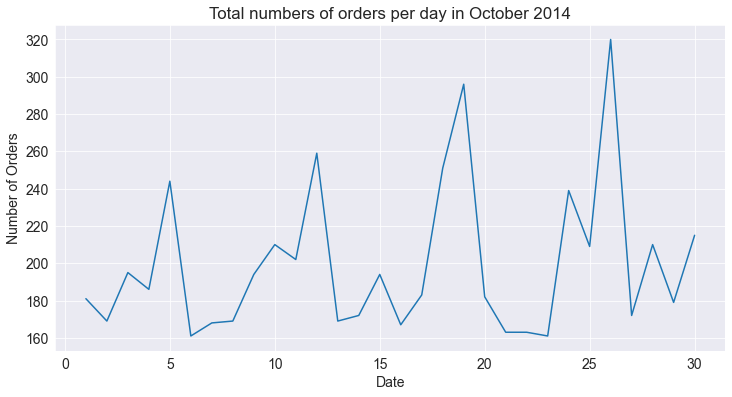

In [16]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12, 6))
plt.plot(date_count.index, date_count, mec='navy')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Total numbers of orders per day in October 2014');

# People tended to order food the most over the weekend, especially in Sunday.

In [17]:
# Order frequency by hour

round(raw_df.hour.value_counts().sort_index()/5983,2)

0     0.01
1     0.01
2     0.00
3     0.00
4     0.00
6     0.00
7     0.00
8     0.01
9     0.01
10    0.03
11    0.05
12    0.07
13    0.05
14    0.04
15    0.04
16    0.05
17    0.08
18    0.13
19    0.16
20    0.12
21    0.08
22    0.04
23    0.02
Name: hour, dtype: float64

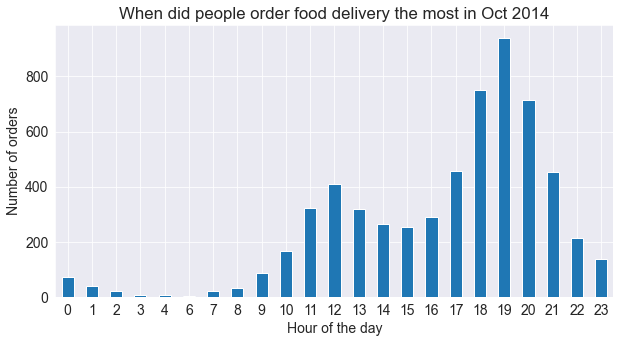

In [18]:
raw_df.hour.value_counts().sort_index().plot(kind='bar',figsize=(10, 5))
plt.xticks(rotation=360)
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.title('When did people order food delivery the most in Oct 2014');

# 41% of users order food delivery from 6pm - 8pm EST.
# 7pm EST is the time when most of the people like to order food on Jumpman23 in October 2014.
# 17% of users order lunch from 11am - 1pm EST.
# 8% of users want late night meal from 10pm - 1am.

In [19]:
# Over 83% of customers prefer to order 1 item.

round(raw_df.item_quantity.value_counts(normalize=1).sort_index(),2)

1.0     0.84
2.0     0.12
3.0     0.02
4.0     0.01
5.0     0.00
6.0     0.00
7.0     0.00
8.0     0.00
12.0    0.00
15.0    0.00
16.0    0.00
Name: item_quantity, dtype: float64

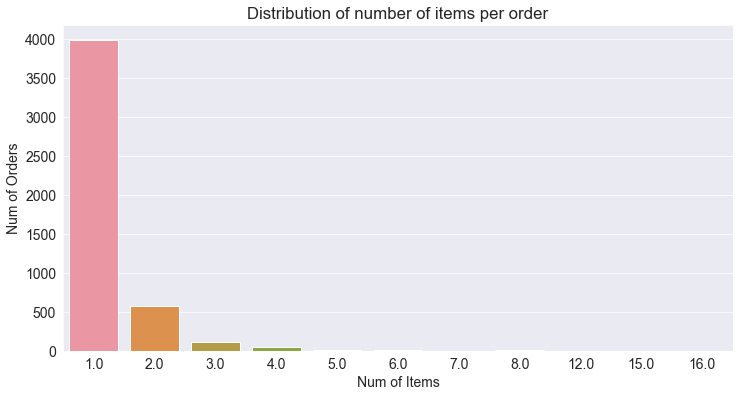

In [20]:
num_items = raw_df.item_quantity.value_counts().sort_index()

plt.figure(figsize=(12,6))
ax2 = sns.barplot(num_items.index, num_items)
plt.title('Distribution of number of items per order')
ax2.set(xlabel='Num of Items', ylabel='Num of Orders')
plt.show();

In [21]:
# There were 3192 unique customers in October 2014

raw_df.customer_id.value_counts()

369272    28
52832     23
275689    17
125123    16
91817     16
          ..
359025     1
354923     1
279895     1
396794     1
376836     1
Name: customer_id, Length: 3192, dtype: int64

In [22]:
unique_customer = raw_df.customer_id.value_counts()

In [23]:
# Repeat customer rate = 39% for NYC in October 2014.

round(unique_customer.value_counts()/3192,2).sort_index()

1     0.61
2     0.20
3     0.09
4     0.04
5     0.02
6     0.01
7     0.01
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
13    0.00
14    0.00
16    0.00
17    0.00
23    0.00
28    0.00
Name: customer_id, dtype: float64

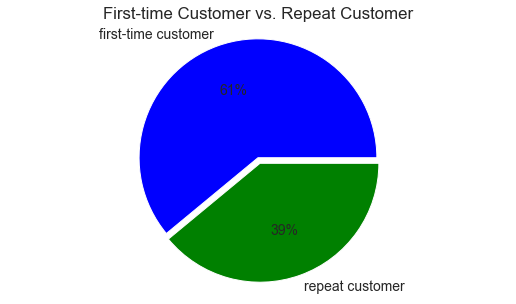

In [24]:
labels = 'first-time customer', 'repeat customer'
sizes = [61, 39]
colors = ['blue', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%0.0f%%', explode=[0,0.05])
plt.title('First-time Customer vs. Repeat Customer')
plt.axis('equal');

In [25]:
cf.go_offline()
py.init_notebook_mode(connected=True)

m = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

pickup_locations = raw_df[['pickup_lat', 'pickup_lon']].to_numpy()

m.add_child(plugins.HeatMap(pickup_locations, radius=15))
m

# NYC pickup locations heatmap: most of the restaurants were in downtown and midtown manhattan. The restaurants around Central Parks were also very popular. 

In [26]:
dropoff_locations = raw_df[['dropoff_lat', 'dropoff_lon']].to_numpy()

m.add_child(plugins.HeatMap(dropoff_locations, radius=15))
m

# People who located in downtown, midtown, and upper east side tended to order food delivery the most in October 2014. 
# Drop-off places in Brooklyn is more spread out than their pick up places, indicating most of the time people who live in Brooklyn would like to order food from Manhattan.

### PART 2: What are the most popular restaurants and items?

<span style="color:navy">The following insights can be utilized on selecting promo / coupon codes to target mass audiences. We can see from the first barchart that NYC people like Italian food the most, followed by Burger, Japanese food, American food, and, Chinese food. As far as popular restaurants, NYC people are crazy about Shake Shack (burger), followed by Momofuku Milk Bar (Japanese), The Meatball Shop (Italian), Blue Ribbon Sushi (Japanese), and Grocery Stores (WF & TJ). Additionally, the top 1 item category in NYC was 'Sides', which is potentially because people tend to order more than one side dish to pair with their main course, indicating a dedicated promo around side dishes may work well in NYC (e.g. BOGO: buy 1 side get 1 free)<br><br>

In [27]:
# Top 10 Categories in NYC that People Like Order Food Delivery the Most Using Jumpman23

raw_df.place_category.value_counts(dropna=False).head(10)

NaN              883
Italian          504
Burger           454
Japanese         433
American         405
Chinese          332
Dessert          315
Sushi            253
Salad            206
Grocery Store    187
Name: place_category, dtype: int64

In [28]:
# Excluding N/A
category_count = raw_df.place_category.value_counts().head(10)

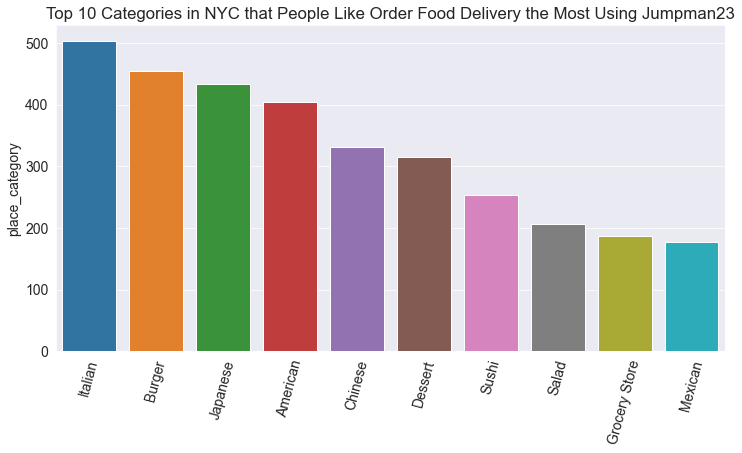

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 Categories in NYC that People Like Order Food Delivery the Most Using Jumpman23')
sns.barplot(category_count.index, category_count);

# We can see from the barchart that NYC people like Italian food the most, followed by Burger, Japanese food, American food, and, Chinese food.

In [30]:
# Top 15 Restaurants in NYC that People Like Order Food Delivery the Most Using Jumpman23

restaurant_count = raw_df.pickup_place.value_counts().head(15)

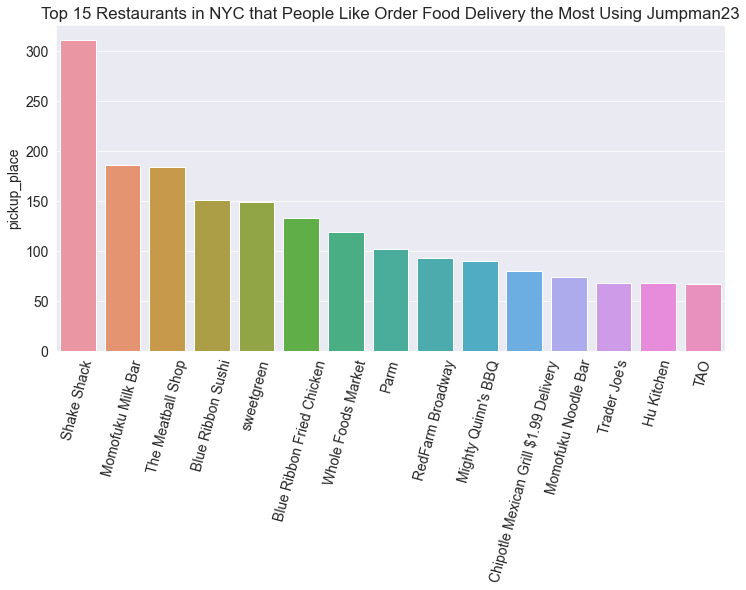

In [31]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 15 Restaurants in NYC that People Like Order Food Delivery the Most Using Jumpman23')
sns.barplot(restaurant_count.index, restaurant_count);

# NYC people are crazy about Shake Shack (burger), followed by Momofuku Milk Bar (Japanese), The Meatball Shop (Italian), Blue Ribbon Sushi (Japanese), and Grocery Stores (WF & TJ)

In [32]:
# Top 15 Item Categories in NYC that People Like Order Food Delivery the Most Using Jumpman23

item_count = raw_df.item_category_name.value_counts().head(15)

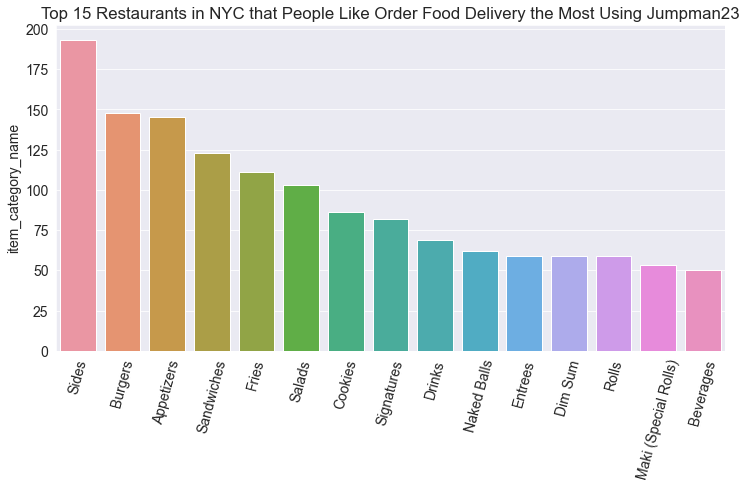

In [33]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 15 Restaurants in NYC that People Like Order Food Delivery the Most Using Jumpman23')
sns.barplot(item_count.index, item_count);

### PART 3: Delivery Method

<span style="color:navy">The primary delivery method was by bicycle - 71%, and the secondary method was by car - 20%. 4.6% of Jumpmen relied on walking to deliver food, which is more than 1.3% of the van delivery method and 0.8% truck delivery method and 0.4% of motorcycles. This is because NYC is a compact city, where the traffic is always very busy 24/7. Therefore, bicycles are the most cost-effective and speedy way to deliver food.

In [34]:
delivery_method =  raw_df.vehicle_type.value_counts()

In [35]:
round(raw_df.vehicle_type.value_counts()/5983,3)

bicycle       0.714
car           0.203
walker        0.046
van           0.013
scooter       0.013
truck         0.008
motorcycle    0.004
Name: vehicle_type, dtype: float64

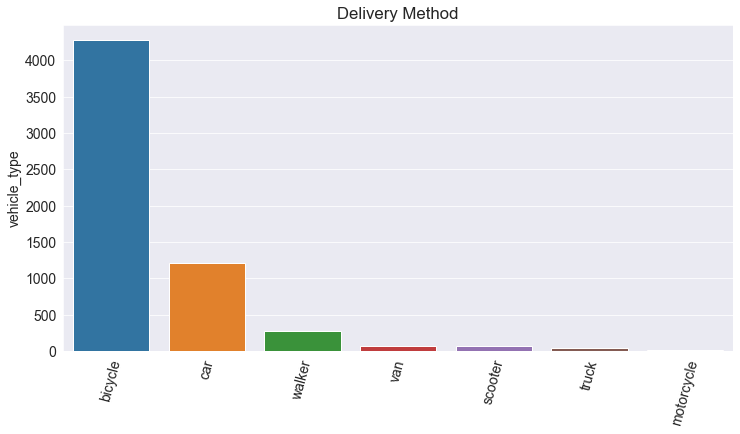

In [36]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Delivery Method')
sns.barplot(delivery_method.index, delivery_method);

### PART 4: How long it took to pick up the food, waiting at the restaurant, and drop off?

<span style="color:navy">By calculating and visulizing the time spent on each delivery phase, we can see that around 50% of Jumpmen spent more than 11 minutes on waiting for food at the restaurant. Additionally, from the multi-histogram we see that 50% of Jumpmen spent more time on waiting for food than delivering the food, which largely increase the overall delivery time. <br><br>
Therefore, we should consider to:<br>
**Reco 1:** push notifications before peak hours to encourage people pre-order food so the waiting time can be reduced to improve efficiency and user experience.<br>
**Reco 2:** standardize the delivery process - for example, organize and assign specific delivery responsibilities across your drivers and restaurant staff, and make it clear to the in-house employees who is in charge of bagging the orders and having them ready to go for drivers.

In [37]:
# Remove missing data for pickup time in order to calculate how long it takes to pick up the items.

round(raw_df.isna().sum()/5983, 2)

delivery_id                            0.00
customer_id                            0.00
jumpman_id                             0.00
vehicle_type                           0.00
pickup_place                           0.00
place_category                         0.15
item_name                              0.21
item_quantity                          0.21
item_category_name                     0.21
how_long_it_took_to_order              0.49
pickup_lat                             0.00
pickup_lon                             0.00
dropoff_lat                            0.00
dropoff_lon                            0.00
when_the_delivery_started              0.00
when_the_Jumpman_arrived_at_pickup     0.09
when_the_Jumpman_left_pickup           0.09
when_the_Jumpman_arrived_at_dropoff    0.00
month                                  0.00
day                                    0.00
weekday                                0.00
year                                   0.00
hour                            

In [38]:
df_dropped_pickupna = raw_df.dropna(subset = ['when_the_Jumpman_arrived_at_pickup', 'when_the_Jumpman_left_pickup'], how='all')
df_dropped_pickupna['when_the_delivery_started'] = pd.to_datetime(df_dropped_pickupna.when_the_delivery_started)
df_dropped_pickupna['when_the_Jumpman_arrived_at_pickup'] = pd.to_datetime(df_dropped_pickupna.when_the_Jumpman_arrived_at_pickup)
df_dropped_pickupna['when_the_Jumpman_left_pickup'] = pd.to_datetime(df_dropped_pickupna.when_the_Jumpman_left_pickup)
df_dropped_pickupna['when_the_Jumpman_arrived_at_dropoff'] = pd.to_datetime(df_dropped_pickupna.when_the_Jumpman_arrived_at_dropoff)

In [39]:
started_time = df_dropped_pickupna.when_the_delivery_started
arrive_time = df_dropped_pickupna.when_the_Jumpman_arrived_at_pickup
actual_pickup_time = df_dropped_pickupna.when_the_Jumpman_left_pickup
droffoff_time = df_dropped_pickupna.when_the_Jumpman_arrived_at_dropoff

In [40]:
# Calculate the time spent on each delivery phase.

before_pickup = arrive_time - started_time
waiting_at_restr = actual_pickup_time - arrive_time
delivery_time = droffoff_time - actual_pickup_time

In [41]:
def get_seconds(time_delta):
    return time_delta.seconds

converted_waiting_time = round(waiting_at_restr.apply(get_seconds) / 60,2)
print(converted_waiting_time)

1       22.33
2       21.85
3       12.33
4       10.60
5        8.33
        ...  
5978    12.30
5979     9.92
5980    22.32
5981    16.78
5982    25.65
Length: 5433, dtype: float64


In [42]:
def get_seconds(time_delta):
    return time_delta.seconds

converted_delivery_time = round(delivery_time.apply(get_seconds) / 60,2)
print(converted_delivery_time)

1       10.98
2        5.50
3       16.00
4       23.12
5        9.72
        ...  
5978    16.83
5979     6.43
5980    24.53
5981    11.32
5982    25.87
Length: 5433, dtype: float64


In [43]:
converted_delivery_time.describe()

count    5433.000000
mean       14.126801
std         9.301270
min         0.830000
25%         7.980000
50%        11.770000
75%        17.380000
max       119.180000
dtype: float64

In [44]:
converted_waiting_time.describe()

count    5433.000000
mean       18.907828
std        12.447894
min         0.000000
25%        10.820000
50%        15.800000
75%        23.830000
max       267.950000
dtype: float64

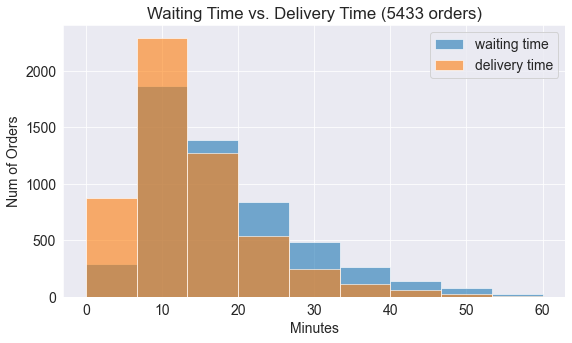

In [45]:
bins = np.linspace(0, 60, 10)

plt.hist(converted_waiting_time, bins, alpha = 0.6, label='waiting time')
plt.hist(converted_delivery_time, bins, alpha = 0.6, label='delivery time')
plt.legend(loc='upper right')
plt.title('Waiting Time vs. Delivery Time (5433 orders)')
plt.xlabel('Minutes')
plt.ylabel('Num of Orders')

plt.show()

# 50% of Jumpmen spent more than 11 minutes on waiting for food at the restaurant
# From the histogram we can tell that 50% of Jumpmen spent more time on waiting for food than delivering the food.
# Reco 1: push notifications before peak hours to encourage people pre-order food so the waiting time can be reduced to improve efficiency and user experience.
# Reco 2: standardize the delivery process - Organize and assign specific delivery responsibilities across your drivers and restaurant staff. 
# make it clear to the in-house employees who is in charge of bagging the orders and having them ready to go for drivers.

### PART 5: How long it took to order?

<span style="color:navy">From the boxplot we can see that it takes around 8 minutes to order on average. While it's not bad, there's still 25% of people who couldn't finish their online order in 9 minutes. Therefore, we should consider to create a SEO optimized website / app and easy-to-read menu to make sure people can find their targeted items right away if they have any.
- 50% of people could finish their online order in around 6 minutes.
- 25% of people could finish their online order from 6 - 9 minutes.
- Around 25% of people couldn't finish their online order in 9 minutes.

In [46]:
# Around 50% of data within how_long_it_took_to_order columns is missing, so the result can only give us a rough estimate.

raw_df.isna().sum()/5983

delivery_id                            0.000000
customer_id                            0.000000
jumpman_id                             0.000000
vehicle_type                           0.000000
pickup_place                           0.000000
place_category                         0.147585
item_name                              0.205582
item_quantity                          0.205582
item_category_name                     0.205582
how_long_it_took_to_order              0.492228
pickup_lat                             0.000000
pickup_lon                             0.000000
dropoff_lat                            0.000000
dropoff_lon                            0.000000
when_the_delivery_started              0.000000
when_the_Jumpman_arrived_at_pickup     0.091927
when_the_Jumpman_left_pickup           0.091927
when_the_Jumpman_arrived_at_dropoff    0.000000
month                                  0.000000
day                                    0.000000
weekday                                0

In [47]:
raw_df['how_long_it_took_to_order'] = pd.to_datetime(raw_df.how_long_it_took_to_order)

In [48]:
def min_to_sec(row):
    return row.minute*60 + row.second
sec = raw_df.how_long_it_took_to_order.apply(min_to_sec)
raw_df['min_to_order'] = round(sec/60,2)

In [49]:
raw_df.min_to_order.describe()

count    3038.000000
mean        7.751754
std         5.313122
min         1.370000
25%         4.430000
50%         6.280000
75%         9.170000
max        58.030000
Name: min_to_order, dtype: float64

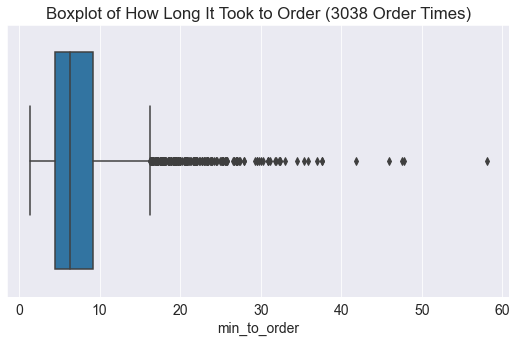

In [50]:
ax = sns.boxplot(x=raw_df.min_to_order).set_title('Boxplot of How Long It Took to Order (3038 Order Times)')